## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID" )

# Display the data table for preview
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
# Group data by mouse ID
group = merge_df.groupby(["Mouse ID"])
group.count()

# Gives you columns with strings of columns (to show Ryan)
# group = pd.DataFrame(group)
# group

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
dup = pd.DataFrame(group["Timepoint"].value_counts())
dup
dup_loc = dup.loc[dup["Timepoint"] > 1]
print(dup_loc)

# Find data on Mouse ID with duplicate to see if the data should be disregarded
data_dup_mouse = merge_df.loc[merge_df["Mouse ID"] == "g989"]
print(data_dup_mouse)

                    Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20  

In [30]:
# Drop any duplicate rows
clean_df = merge_df.drop([908,909,910,911,912,913,914,915,916,917,918,919,920])


In [29]:
# Recheck the number of mice
clean_group_df = pd.DataFrame(clean_df.groupby("Mouse ID").count())


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
# Group the clean data by regimen
aggr = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "sem", "var", "std"]})

aggr.columns = ["Tummor Vol Mean", "Tumor Vol Median", "Tumor Vol SEM", "Tumor Vol Variance", "Tumor Vol Standard Deviation"]

aggr_df = pd.DataFrame(aggr)
aggr_df = aggr_df.reset_index()


## Bar and Pie Charts

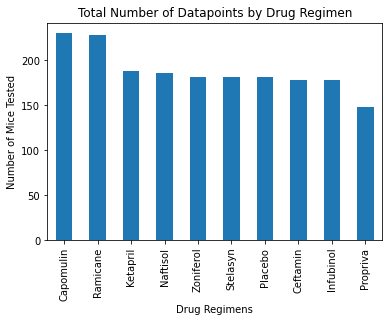

<Figure size 432x288 with 0 Axes>

In [27]:
# Determine datapoints by regimen
datapoints = clean_df["Drug Regimen"].value_counts()
datapoints_df = pd.DataFrame(datapoints)

# Generate bar plot using Pandas DataFrame.plot
ax = datapoints_df.plot(kind="bar",legend=False, title = "Total Number of Datapoints by Drug Regimen", 
                   rot = 90)
ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Number of Mice Tested')
plt.show()
# Resize plot to display labels
plt.tight_layout()


  Drug Regimen  Datapoints
0    Capomulin         230
1     Ramicane         228
2     Ketapril         188
3     Naftisol         186
4    Zoniferol         182
5     Stelasyn         181
6      Placebo         181
7     Ceftamin         178
8    Infubinol         178
9     Propriva         148


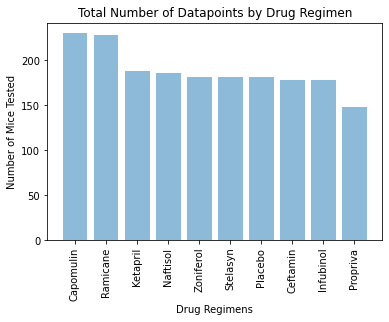

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate identical bar plot using pyplot instead of pandas.

# Rename the columns for matplotlib
datapoints = clean_df["Drug Regimen"].value_counts()
datapoints_df = pd.DataFrame(datapoints)
datapoints_df = datapoints_df.reset_index()
datapoints_df.columns = ["Drug Regimen", "Datapoints"]
print(datapoints_df)

# Generate bar plot using matplotlib
x_axis = np.arange(len(datapoints))
plt.bar(x_axis, datapoints, alpha=0.5, align="center")
plt.xlabel('Drug Regimens')
plt.ylabel('Number of Mice Tested')
plt.title("Total Number of Datapoints by Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, datapoints_df["Drug Regimen"], rotation = 90)
plt.show()
# Resize plot to display labels
plt.tight_layout()


        Sex
Male    125
Female  123


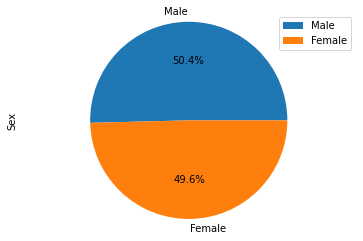

In [9]:
# Collect data for plot
sex_df = pd.DataFrame(clean_df.groupby(["Mouse ID", "Sex"]).count())
sex_df = sex_df.reset_index()
sex_df = pd.DataFrame(sex_df.Sex.value_counts())
print(sex_df)

# Generate a pie plot showing the distribution of female versus male mice using pandas
ax1 = sex_df.plot.pie(y = "Sex", subplots=True, autopct='%1.1f%%')
plt.axis("equal")
# Show plot
plt.show()

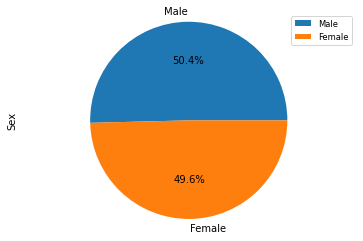

In [10]:
# Generate identical pie plot using pyplot
sex_df.columns
sex = ["Male","Female"]
plt.pie(sex_df.Sex, autopct="%1.1f%%", labels=sex)
plt.ylabel("Sex")
plt.axis("equal")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane,Infubinol, and Ceftamin
# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
maxi = clean_df.groupby(["Mouse ID"]).max()
maxi
# Merge the max timepoint dataframe with the original data
merge_vol_df = pd.merge(maxi, clean_df, on = ["Mouse ID","Timepoint"], how = "left")
merge_vol_df.reset_index()


,index,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,0,a203,Infubinol,Female,20,23,45,67.973419,2,Infubinol,Female,20,23,67.973419,2
1,1,a251,Infubinol,Female,21,25,45,65.525743,1,Infubinol,Female,21,25,65.525743,1
2,2,a262,Placebo,Female,17,29,45,70.717621,4,Placebo,Female,17,29,70.717621,4
3,3,a275,Ceftamin,Female,20,28,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3
4,4,a366,Stelasyn,Female,16,29,30,63.440686,1,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,z435,Propriva,Female,12,26,10,48.710661,0,Propriva,Female,12,26,48.710661,0
244,244,z578,Ramicane,Male,11,16,45,45.000000,0,Ramicane,Male,11,16,30.638696,0
245,245,z581,Infubinol,Female,24,25,45,62.754451,3,Infubinol,Female,24,25,62.754451,3
246,246,z795,Naftisol,Female,13,29,45,65.741070,3,Naftisol,Female,13,29,65.741070,3


In [25]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
list_drug = ["Capomulin", "Ramicane","Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
vol_list = []
for treatment in list_drug:
    volume = merge_vol_df.loc[merge_vol_df["Drug Regimen_x"]==treatment,"Tumor Volume (mm3)_y"]
    #volume = merge_vol_df.loc[merge_vol_df["Drug Regimen_x"]==treatment,["Tumor Volume (mm3)_y"]] 
    #(Why did having the second [] around Tumor Volume mm3 give me an error in the quartile .25...key error?)
    vol_list.append(volume)
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volume.loc[(volume <lower_bound) | (volume > upper_bound)] 
    print(f"{treatment}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3)_y, dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)


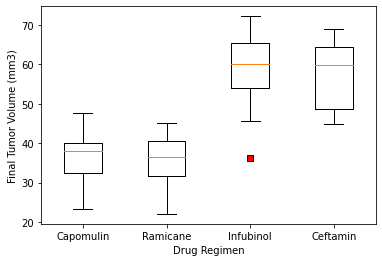

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
red_square = dict(markerfacecolor='r', marker='s')
fig7, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xlabel("Drug Regimen")
ax.boxplot(vol_list, labels = list_drug, flierprops = red_square)

plt.show()

## Line and Scatter Plots

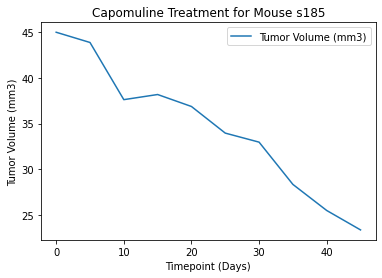

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
s185_df = clean_df.loc[clean_df["Mouse ID"] == "s185"]
s185_df = s185_df[["Timepoint","Tumor Volume (mm3)"]]
s185_df.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line')
plt.title("Capomuline Treatment for Mouse s185")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

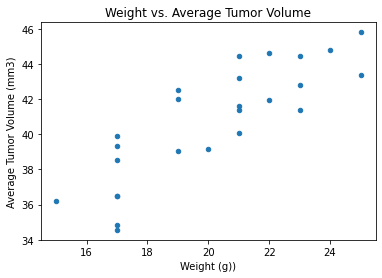

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
avg_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_df
weight_df = avg_df.groupby(["Mouse ID"]).mean()
weight_df
# weight_df = pd.DataFrame(weight_df["Tumor Volume (mm3)"])
# weight_df = weight_df.reset_index()
# weight_df

weight_df.plot(x ='Weight (g)', y='Tumor Volume (mm3)', kind = 'scatter')
plt.title("Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


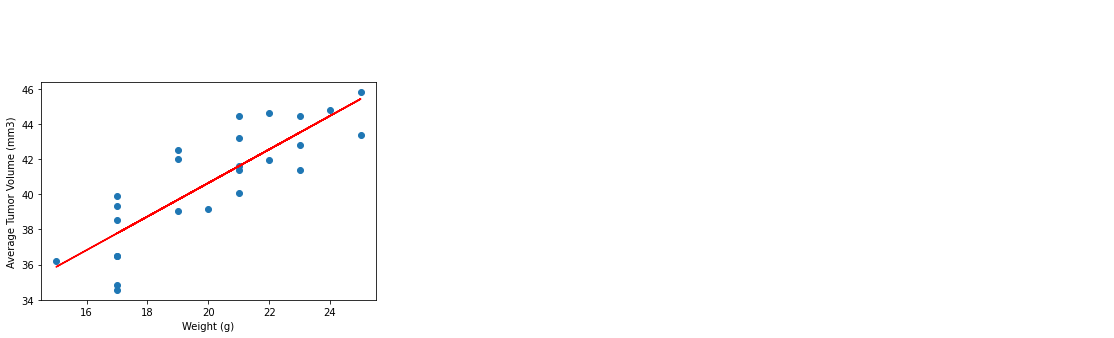

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_df['Weight (g)']
y_values = weight_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()


# Observations and Insights